# K-Means

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
os.environ['OMP_NUM_THREADS']='1'


In [15]:
dataset = pd.read_csv('../dataset/KMeansData.csv')
dataset

#k-means는 비지도학습(정답이없다)이기떄문에 y값은 필요없음
X = dataset.iloc[:,:].values
X[:5]

array([[ 7.33, 73.  ],
       [ 3.71, 55.  ],
       [ 3.43, 55.  ],
       [ 3.06, 89.  ],
       [ 3.33, 79.  ]])

### 데이터 시각화(전체데이터 분포)

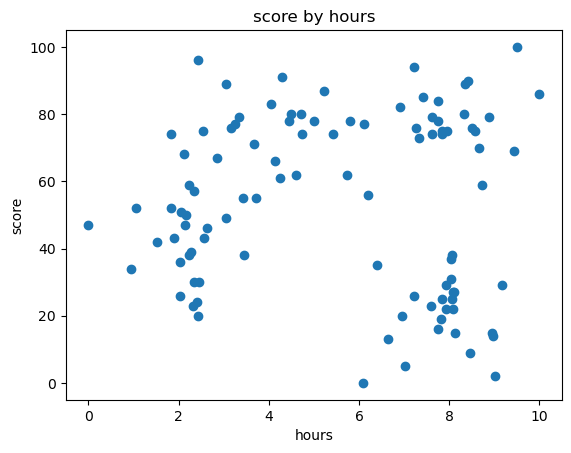

In [16]:
plt.scatter(X[:,0],X[:,1]) #축:공부시간 y축:점수
plt.title('score by hours')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()


### 데이터 시각화(축 범위 통일)

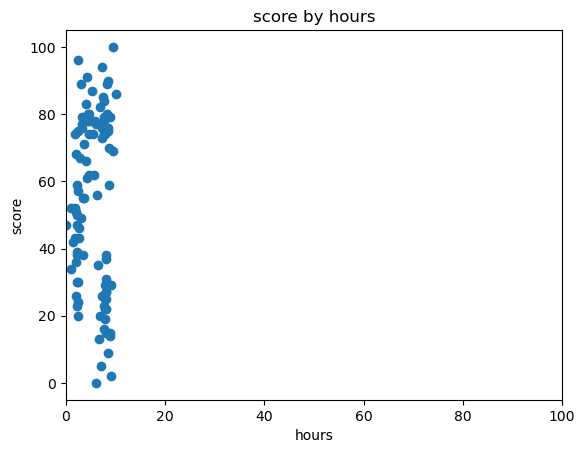

In [17]:
plt.scatter(X[:,0],X[:,1]) #축:공부시간 y축:점수
plt.title('score by hours')
plt.xlabel('hours')
plt.xlim(0,100)
plt.ylabel('score')
plt.show()


### 피처 스케일링(Feature Scaling)

In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X[:5]

array([[ 0.68729921,  0.73538376],
       [-0.66687438,  0.04198891],
       [-0.77161709,  0.04198891],
       [-0.9100271 ,  1.35173473],
       [-0.8090252 ,  0.96651537]])

### 데이터 시각화(스케일링된 데이터)

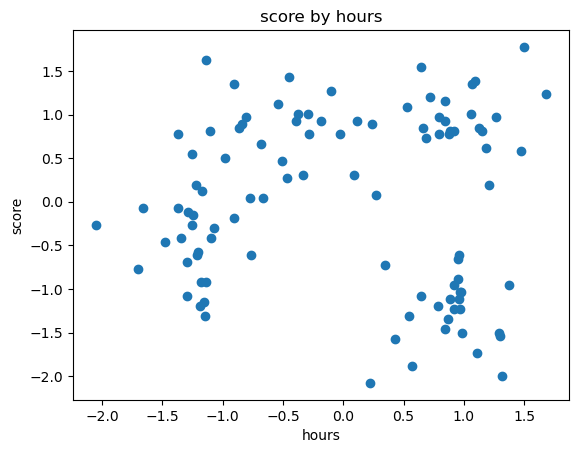

In [19]:
plt.scatter(X[:,0],X[:,1]) #축:공부시간 y축:점수
plt.title('score by hours')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()


### 최적의 k값 찾기(엘보우 방식 Elbow Method)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


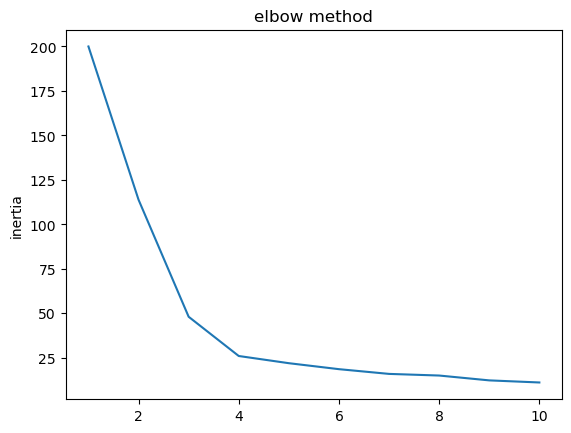

In [20]:
from sklearn.cluster import KMeans
inertia_list = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(X)
    inertia_list.append(kmeans.inertia_) # 각지점으로부터 클러스터의 중심까지 거리 제곱의 합
plt.plot(range(1,11), inertia_list)
plt.title('elbow method')
plt.ylabel('inertia')
plt.show()

### 최적의 k(4)값으로 KMeans 학습!

In [ ]:
# 최적의 K값은 4다(완만해지는곳)
K = 4

In [27]:
kmeans = KMeans(n_clusters=4, random_state=0)
# kmeans.fit(X)
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([2, 3, 3, 0, 0, 1, 1, 0, 2, 0, 0, 3, 1, 3, 3, 0, 1, 2, 3, 0, 1, 0,
       3, 1, 2, 2, 3, 3, 3, 3, 1, 1, 3, 0, 2, 2, 3, 0, 0, 0, 3, 1, 2, 3,
       3, 2, 1, 0, 1, 1, 2, 0, 1, 1, 0, 0, 0, 0, 3, 1, 1, 2, 2, 2, 2, 1,
       1, 0, 1, 2, 3, 2, 2, 2, 3, 3, 3, 3, 0, 2, 1, 2, 1, 1, 2, 0, 3, 1,
       2, 3, 0, 1, 0, 2, 3, 2, 2, 0, 1, 3])

### 데이터 시각화(최적의 K)

In [29]:
centers = kmeans.cluster_centers_ # 클러스터의 중심점 좌표
centers

array([[-0.57163957,  0.85415973],
       [ 0.8837666 , -1.26929779],
       [ 0.94107583,  0.93569782],
       [-1.22698889, -0.46768593]])

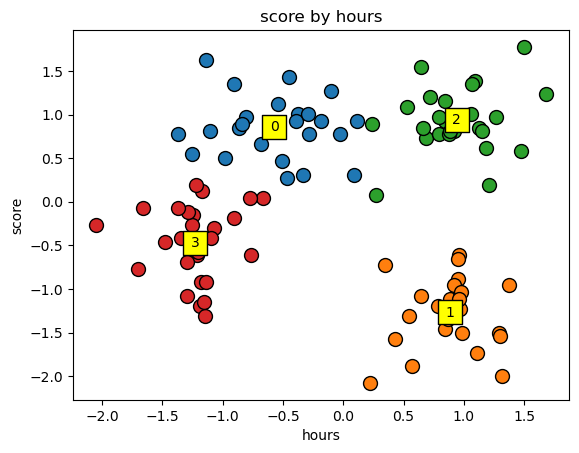

In [33]:
for cluster in range(K):
    plt.scatter(X[y_kmeans==cluster,0], X[y_kmeans==cluster,1],s=100, edgecolor='black')
    plt.scatter(centers[cluster,0], centers[cluster,1],s=300,edgecolor='black',color='yellow',marker='s')
    plt.text(centers[cluster,0], centers[cluster,1],cluster,va='center',ha='center') #cluster 텍스트 출력
plt.title('score by hours')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

### 데이터 시각화(스케일링 원복)

In [34]:
X_org = sc.inverse_transform(X) # 피쳐스케일링데이터 원복
X_org[:5]

array([[ 7.33, 73.  ],
       [ 3.71, 55.  ],
       [ 3.43, 55.  ],
       [ 3.06, 89.  ],
       [ 3.33, 79.  ]])

In [35]:
centers_org = sc.inverse_transform(centers)
centers_org

array([[ 3.96458333, 76.08333333],
       [ 7.8552    , 20.96      ],
       [ 8.0084    , 78.2       ],
       [ 2.21269231, 41.76923077]])

### 데이터 시각화

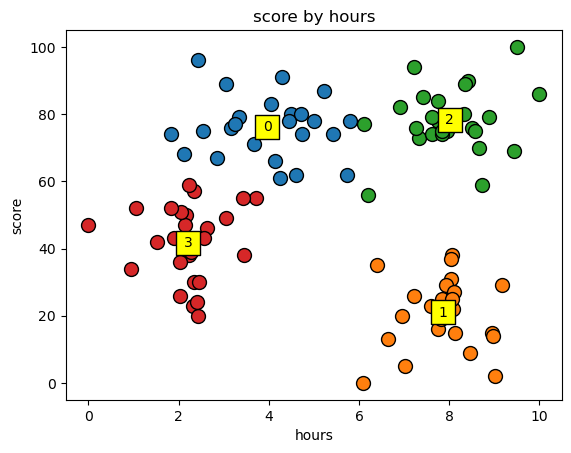

In [36]:
for cluster in range(K):
    plt.scatter(X_org[y_kmeans==cluster,0], X_org[y_kmeans==cluster,1],s=100, edgecolor='black')
    plt.scatter(centers_org[cluster,0], centers_org[cluster,1],s=300,edgecolor='black',color='yellow',marker='s')
    plt.text(centers_org[cluster,0], centers_org[cluster,1],cluster,va='center',ha='center') #cluster 텍스트 출력
plt.title('score by hours')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()